# <font color=#0099ff face="微软雅黑">SVM——示例</font>  

## <font color=#0099ff face="微软雅黑">线性可分</font>  

下面将通过案例介绍SVM的使用方法。首先随机生成一些分类数据，并用散点图画出数据分布。

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns;sns.set() 

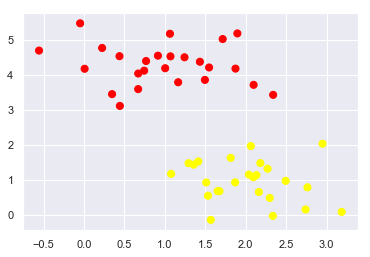

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

这是一个线性可分的数据集，我们可以很容易地找到一条直线将两类数据分割开。

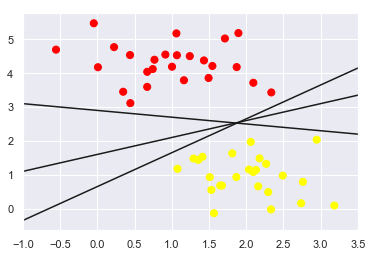

In [3]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

在SVM中，这样的分界线叫做<font color=#FF0000 >分离超平面</font> 。<br />
如果它仅仅是一条线，我们为什么称它为一个超平面？<br />
&emsp;&emsp;在一维的平面中，它是点；<br />
&emsp;&emsp;在二维中，它是线；<br />
&emsp;&emsp;在三维中，它是面；<br />
&emsp;&emsp;在更高的维度中，我们可以称之为超平面。<br />

在这个例子中，可以找到好几个分离超平面。它们每一个都是正确的，可以成功将数据集划分两边。那么什么样的分离超平面分类效果好呢？<br />
SVM的思路就是找到一个分离超平面，能够尽可能的远离所有类别的数据点。

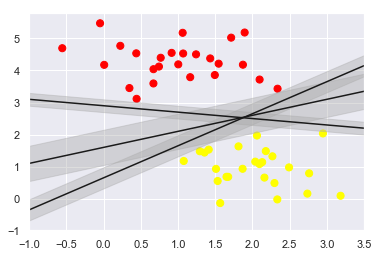

In [4]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

我们在图上画出分离超平面到最近的样本点的距离，SVM要做的事就是找到间隔最大的那个<font color=#FF0000 >最优分离超平面</font>，而且它到正样本最近点的距离和到负样本最近点的距离是相等的。<br />
下面调用SVM模型训练这批数据，并绘出结果。

In [5]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [6]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

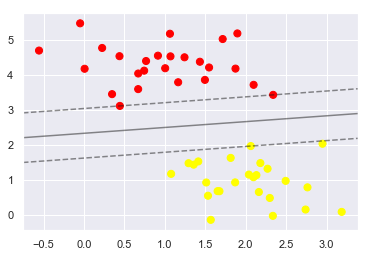

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

黑色直线就是间隔最大化的最优分离超平面，其中有3个训练点在虚线上，这些点被称为<font color=#FF0000 >支持向量</font>，存储在模型的support_vectors_属性中：

In [8]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

只有支持向量才会对分类边界有影响，分别使用60个和120个数据点，最优分离超平面并没有发生变化。所以只要支持向量不变，并不影响模型的结果。

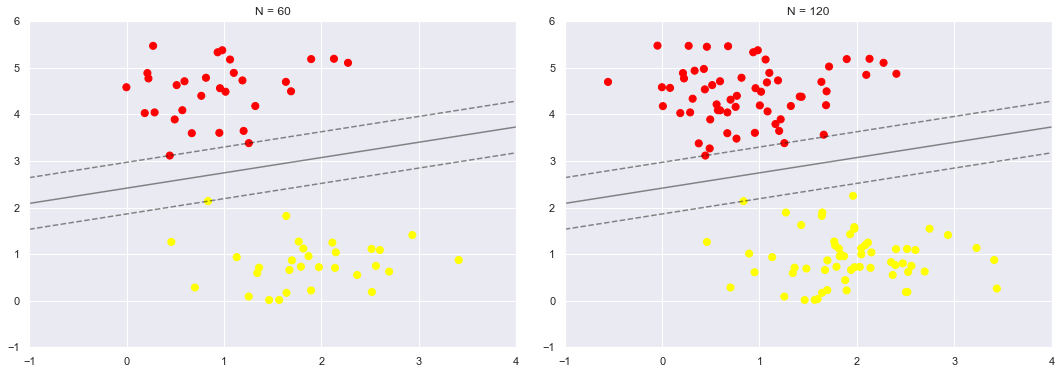

In [9]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

## <font color=#0099ff face="微软雅黑">线性不可分</font>  

下面随机生成另一批数据，可以看到，直线已经无法将它们区分开。

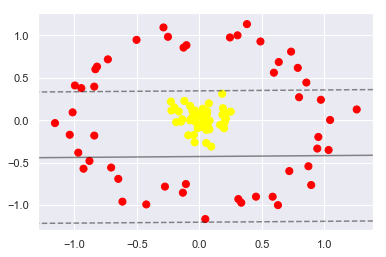

In [10]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

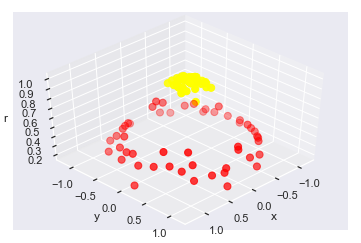

In [11]:
from mpl_toolkits import mplot3d
r = np.exp(-(X ** 2).sum(1))
def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim) # 设置3D视图的角度  一般都为45
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

plot_3D(elev=45, azim=45, X=X, y=y)

将二维空间上的这些样本点通过函数映射到三维空间，在三维空间中两组数据可以用一个平面分隔开。在二维空间线性不可分的数据，到了更高维的三维空间变成了线性可分。<br />
SVM中<font color=#FF0000 >核函数</font>的基本作用就是接受低维空间里的向量，能够计算出经过某个变换后在高维空间里的向量内积值，而不必完全由高维空间上的点进行计算，从而达到降低运算复杂度的作用。在SVM应用核函数，可以处理线性不可分的问题。

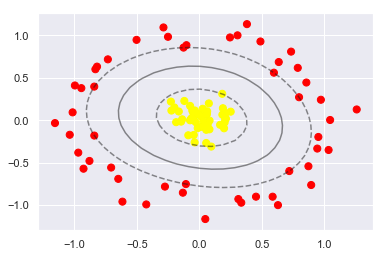

In [12]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

## <font color=#0099ff face="微软雅黑">参数的作用</font>  

SVM主要有两个参数：C和gamma。C是处理软间隔问题，先看下面一组有噪声的数据分布。

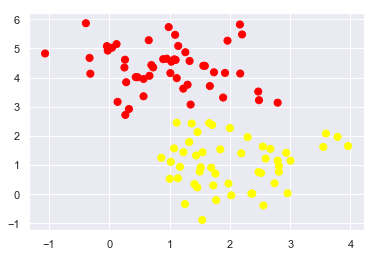

In [13]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

这些数据和之前线性可分的数据很像，但因为个别样本点的存在，使得无法仅用直线将两组数据完全区分开，这样类似的问题（仅有少数点线性不可分）叫做“近似线性可分”的问题。<br />
在现实情况下，很有可能的是，这个个别样本点压根就是错误，是噪声，是提供训练集的同学人工分类时一打瞌睡错放进去的。所以我们会简单的忽略这个样本点，仍然使用原来的分类器，其效果丝毫不受影响。<br />
但是机器是没有这种容错性的，它硬性的要求所有样本点都满足和分类平面间的距离必须大于某个值，这种解法其实也叫做“硬间隔”分类法。所以我们在模型中加入松弛变量，并用惩罚因子来控制允许容忍多少误差，这种解法叫做“软间隔”分类法。C就是惩罚系数，即对误差的宽容度。C越高，说明越不能容忍出现误差，C越小则相反。

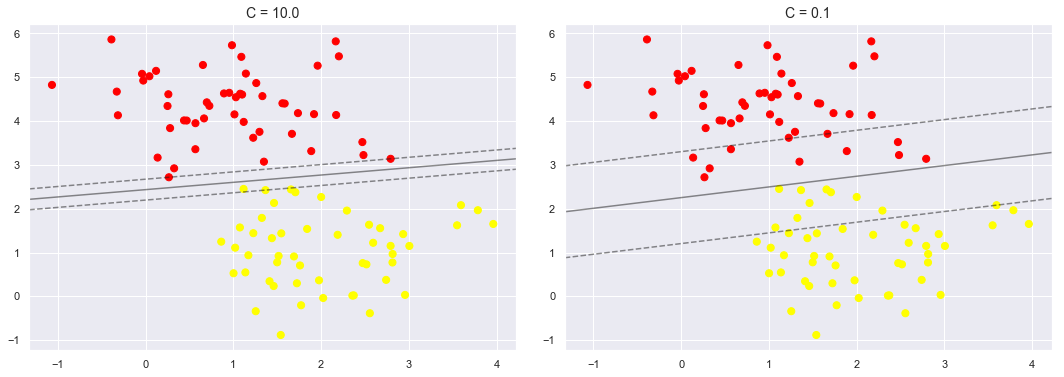

In [14]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)
 
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
 
for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

再看另一个参数gamma，这个参数只在高斯核函数里面才有。默认是“auto”，使用样本特征数的倒数，即1 / n_features。它控制着模型的复杂程度，gamma越大，模型越复杂，gamma越小，模型就越精简。

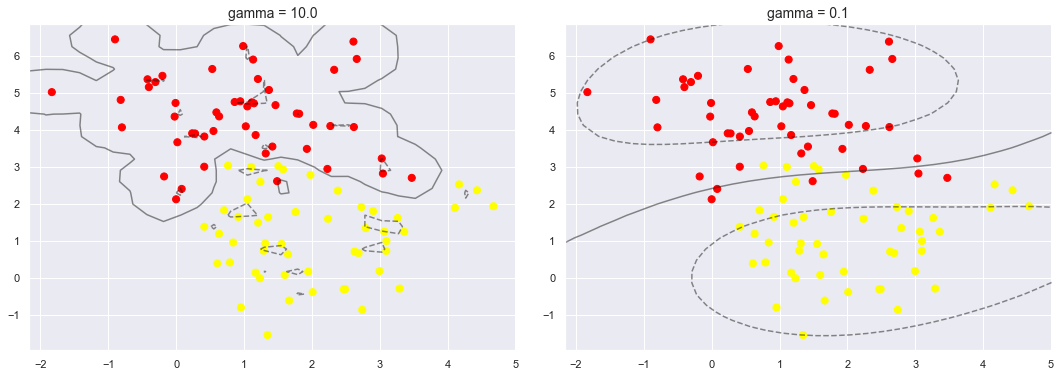

In [15]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.1)
 
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
 
for axi, gamma in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='rbf', gamma=gamma).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('gamma = {0:.1f}'.format(gamma), size=14)

# <font color=#0099ff face="微软雅黑">SVM——原理</font>  

<font color=#FF0000 >基本概念</font> ：支持向量机，因其英文名为support vector machine，故一般简称SVM。通俗来讲，它是一类按监督学习方式对数据进行二元分类的模型，其基本模型定义为特征空间上的间隔最大的线性分类器，其学习策略便是间隔最大化，最终可转化为一个凸二次规划问题的求解。<br />

## <font color=#0099ff face="微软雅黑">知识准备：向量与空间距离</font>  

### <font color=#0099ff face="微软雅黑">向量的大小和方向</font>  

在二维空间上定义一个点A (3,4)，原点O到A就是一个向量$\vec {OA}$，也可以找一个其他的字母标记来标识它，例如 $u(3,4)$。<br />
向量有大小和方向，一个向量x的大小写作||x||，称作向量的模。||OA||是线段OA的长度。通过勾股定理可以轻松算出||OA||=5。<br />

![向量](http://i2.wp.com/www.svm-tutorial.com/wp-content/uploads/2014/11/03-norm.png)

<td bgcolor=#DBDBDB> 定义：向量$u(u_1,u_2$)的方向是向量$w(\frac{u_1}{||u||},\frac{u_2}{||u||})$ </td>

求向量w的坐标需要借助向量u的夹角$\alpha$和$\theta$

![向量方向](http://i2.wp.com/www.svm-tutorial.com/wp-content/uploads/2014/11/03-direction-angle.png)

$$cos(\alpha)=\frac{u_1}{||u||}=\frac{3}{5}=0.6$$
$$cos(\theta)=\frac{u_2}{||u||}=\frac{4}{5}=0.8$$

向量$u(3,4)$的方向是向量$w(0.6,0.8)$，我们可以看出w和u看起来一样，只是w的值小一点。并且w的模长为1，我们也把它称之为单位向量。

### <font color=#0099ff face="微软雅黑">向量的加减法</font>  

![向量加法](http://i2.wp.com/www.svm-tutorial.com/wp-content/uploads/2014/11/05-sum-of-two-vectors-e1415553207340.png)

$$u+v=(u_1+v_1,u_2+v_2)$$

![向量减法1](http://i2.wp.com/www.svm-tutorial.com/wp-content/uploads/2014/11/07-difference-of-two-vectors-2-e1415553244853.png)

$$u-v=(u_1-v_1,u_2-v_2)$$

![向量减法2](http://i2.wp.com/www.svm-tutorial.com/wp-content/uploads/2014/11/09-difference-of-two-vectors-4-e1415553260918.png)

$$v-u=(v_1-u_1,v_2-u_2)$$

### <font color=#0099ff face="微软雅黑">向量的内积</font>  

<td bgcolor=#DBDBDB> 定义：从几何学来说，它是两个向量的模长以及它们之间的夹角余弦值的乘积，返回一个标量（实数）。 </td>

$$x\cdot y=∥x∥∥y∥cos(\theta)$$

### <font color=#0099ff face="微软雅黑">向量的正交投影</font>  

![正交投影](http://i1.wp.com/www.svm-tutorial.com/wp-content/uploads/2014/11/14-projection-3-e1415553165199.png)

有两个向量x与y，怎么求x在y上的正交投影？如图所示，将x投射到y上，得到向量z。

由（1）和（2）：
$$cos(\theta)=\frac{||z||}{||x||}\tag{1}$$

$$cos(\theta)=\frac{x\cdot y}{∥x∥∥y∥}\tag{2}$$
可以算得（3）：

$$||z||=\frac{x\cdot y}{∥y∥}\tag{3}$$

如果我们定义了u作为y的方向那么： 
$$u=\frac{y}{||y||}\tag{4}$$

$$u=\frac{z}{||z||}\tag{5}$$

把（4）代入（3），得：
$$||z||=x\cdot u\tag{6}$$

把（6）代入（5），得到
$$z=(u⋅x)u$$ 

这就是向量x在y上的正交投影，在这个例子中我们可以算出z的坐标是$z(1,4)$。

为什么要费心思去讲正交投影？因为它能帮助我们计算一个距离$∥x−z∥$，相当于SVM中样本点到超平面的距离，在这个例子中可以用x和z的坐标可以轻松算到$∥x−z∥=\sqrt{17}$。 

## <font color=#0099ff face="微软雅黑">最优超平面和最大间隔</font>  

### <font color=#0099ff face="微软雅黑">定义超平面</font>  

我们都知道一条直线的数学方程是：$y=ax+b$（注意它和$y−ax−b=0$ 其实是等价的），而超平面会被定义成类似的形式：

$$f(x)=w^Tx+b$$

超平面的方程可以看出，变量的名称是粗体的。所以它们不是标量，而是向量，$w^Tx$是两个向量的内积,采用$w^Tx$是因为在多于二维的空间里，这个方程式更适用，为了简化书写，下面用$w·x$代替。<br />

给出一个超平面$H$划分数据集并且满足：<br />
$w⋅x+b=0$<br />
我们选择其他两个划分数据集的超平面的$H_0$和$H_1$，有如下的方程： <br />
$w⋅x+b=\delta$<br />
$w⋅x+b=-\delta$<br />
设定$\delta$与-$\delta$的原因是为了让$H$与$H_0$和$H_1$等距。

不过再仔细想想，会发现$w$和$b$是可以缩放的，这里的变量$\delta$其实是没有必要的，为了简化(不引入那么多未知数)，我们通过一定的缩放，让$\delta$=1，$-\delta$=-1，让正类的y为1，负类的y为-1来简化问题。于是我们有了以下形式的2个超平面：
$w⋅x+b=1$<br />
$w⋅x+b=−1$

正类和负类分别在$H_0$和$H_1$的两侧，所以我们得到约束条件：<br />
$w⋅x_i+b≥1 $  &emsp;&emsp;for $x_i$属于类别1<br />
$w⋅x_i+b≤−1$  &emsp;for $x_i$属于类别−1

对两个约束条件同乘$y_i$，可以将其合并为一个约束条件：<br />
$y_1(w⋅x_i+b)≥1 $ &emsp;for all $1≤x_i≤n$

### <font color=#0099ff face="微软雅黑">计算间隔</font>  

接下来要做的事情是最大化两个超平面之间的距离，那两个超平面之间的距离怎么计算呢？首先做一些定义：<br />
$H_0$是满足约束$w⋅x+b=−1$的超平面<br />
$H_1$是满足约束$w⋅x+b=1$的超平面<br />
$x_0$ 是 $H_0$上的一点
从$x_0$到超平面$H_1$的垂直距离m就是我们所说的间隔。

![m](http://i1.wp.com/www.svm-tutorial.com/wp-content/uploads/2015/06/svm_margin_demonstration_1.png)

$x_0$如果和另一个超平面距离$m$的话，我们加上$m$可以得到另一个超平面上的点。<br />
不过m是一个标量，$x_0$是一个向量，在一个向量上加一个标量的运算是完成不了的。<br />
那我们将m变换成一个向量，我们将能够做一个加法。<br />

向量的长度是m，但是现在还缺少一个方向，而$w$是超平面的法向量，垂直于超平面。（可以证明）

![m1](http://i1.wp.com/www.svm-tutorial.com/wp-content/uploads/2015/06/svm_margin_demonstration_3.png)

我们定义$u=\frac{w}{||w||}$是$w$的单位向量，即$||u||=1$，且它和$w$有相同的方向，垂直于平面$H_1$。

![m2](http://i2.wp.com/www.svm-tutorial.com/wp-content/uploads/2015/06/svm_margin_demonstration_4.png)

用$u$乘以m，得到向量$k$=m$u$，$k$满足：<br />
$||k||=1$<br />
$k$垂直于$H_1$<br />
通过这样一个方式把m转换成一个可以和向量$x_0$相加的向量$k$。

![m3](http://i2.wp.com/www.svm-tutorial.com/wp-content/uploads/2015/06/svm_margin_demonstration_7.png)

我们把$x_0$加上$k$得到一个向量$z_0=x_0+k$，$z_0$在$H_1$上，意味着：<br />
$w⋅z_0+b=1$<br />
$w⋅(x_0+k)+b=1$<br />

将$k$=m$u$ ,$u=\frac{w}{||w||}$代入：<br />
$w⋅(x_0+m\frac{w}{||w||})+b=1$<br />

展开，向量与自己的内积是它的模的平方，算得：<br />
$w⋅x_0+m\frac{w⋅w}{||w||}+b=1$<br />
$w⋅x_0+m\frac{||w||^{2}}{||w||}+b=1$<br />
$w⋅x_0+b=1−m∥w∥$

又因为$x_0$在$H_0$上，所以$w⋅x_0+b=−1$，代入算得：<br />
m=$\frac{2}{||w||}$

SVM的目标是求最大化间隔，也相当于是最小化$w$的模。

于是，<font color=#FF0000 >SVM的基本型</font>可以定义为：<br />

$$min \frac{1}{2}||w||^{2}\quad  s.t.,y_i(w^{T}x+b)≥1,i=1...n$$

这是一个不等式约束的最小化问题，定义为$\frac{1}{2}||w||^{2}$是为了方便求导，接下来要做的事就是如何求解这个方程。

## <font color=#0099ff face="微软雅黑">目标函数求解</font>  

上面的基本型目标函数是二次的，约束条件是线性的，这是一个<font color=#FF0000 >凸二次规划问题</font>。

使用<font color=#FF0000 >拉格朗日乘子法</font>可以得到其“对偶问题”。<br />
通过给每一个约束条件加上一个拉格朗日乘子，然后定义出拉格朗日函数，可以将约束条件融合进目标函数中。目的是只需要通过一个目标函数包含约束条件，便可以清楚解释问题。

添加拉格朗日乘子$\alpha _{i} \geq 0$，则拉格朗日函数可写为：

$$L(w,b,α)= \frac{1}{2}∥w∥^{2} +\sum_{i=1}^n \alpha _{i}(1-y_i(w^{T}x_i+b))$$

于是目标函数可以表示为：
$$\min_{w,b}\max_{α≥0}L(w,b,α)$$

满足KKT条件下，等价于：
$$\max_{α≥0}\min_{w,b}L(w,b,α)$$

<font color=#FF0000 >KKT条件</font>是一个非线性规划问题能有最优化解法的充分和必要条件，包含以下三项：
$$α_i≥0$$
$$y_i(wx_i+b)−1≥0$$
$$α_i(y_i(wx_i+b)−1)=0$$


 
要想求$L(w,b,α)$最小化时的w、b，不太容易得到，所以引入对偶变换，通过求解拉格朗日乘子得到w、b。首先让L关于w，b最小化，分别令L关于w，b的偏导数为0，
$$\frac{\partial L}{\partial w}=0 \quad \implies w=\sum_{i=1}^n\alpha _{i}y_ix_i$$ 
$$\frac{\partial L}{\partial b}=0 \quad \implies \sum_{i=1}^n\alpha _{i}y_i=0$$ 

再代回原式，问题转化为：
$$\max_{α≥0}\sum_{i=1}^nα_i-\frac{1}{2}\sum_{i,j=1}^nα_iα_jy_iy_jx_i^{T}x_j \quad  s.t.,\sum_{i=1}^nα_iy_i=0,α_i≥0$$
 
这个问题可以用快速学习算法SMO求解，求得$α_i$的解，也就能求出$w$和b，从而得到最优超平面和最大间隔。

## <font color=#0099ff face="微软雅黑">软间隔：松弛变量和惩罚因子</font>  

在第一部分的例子中，我们用软间隔处理了线性不可分的数据，
引入松弛变量$\xi_{i}$后，我们的约束条件其实变成了：

$$y_1(w⋅x_i+b)≥\color{blue}{1-\xi_{i}}  \quad for \quad all \quad  1≤x_i≤n$$
$$\xi_{i}≥0$$

$\xi_{i}$代表数据点允许偏离的函数间隔的量，如果$\xi_{i}$可以任意大的话，那么任意的超平面都是符合条件的了，所以我们在原本的目标函数加上一项，使得这些$\xi_{i}$的总和也要最小，新的优化目标为：
$$min \frac{1}{2}||w||^{2}+\color{blue}{C\sum_{i=1}^n\xi_{i}}  \quad  s.t.,y_i(w^{T}x+b)≥1-\xi_{i},\xi_{i}≥0$$

公式中蓝色的部分为在线性可分问题的基础上加上的惩罚函数部分，C是一个由用户去指定的系数，表示对分错的点加入多少的惩罚，当C很大的时候，分错的点就会更少，但是过拟合的情况可能会比较严重，当C很小的时候，分错的点可能会很多，不过可能由此得到的模型也会不太正确，对C的设定是一个参数调优的过程。

用之前的方法将约束条件加入到目标函数中，得到新的拉格朗日函数，再让L关于w、b、$\xi$最小化，得到和原来一样的目标函数：<br />
$$\max_{α≥0}\sum_{i=1}^nα_i-\frac{1}{2}\sum_{i,j=1}^nα_iα_jy_iy_jx_i^{T}x_j \quad  s.t.,\sum_{i=1}^nα_iy_i=0,\color{blue}{C≥α_i≥0}$$
唯一的区别就是α多了一个上限C，范围从[0, +∞)，变为了[0, C]，增加的惩罚项没有为对偶问题增加什么复杂度

## <font color=#0099ff face="微软雅黑">线性不可分：核函数</font>  

引入核函数可以解决线性不可分的问题，将原对偶问题的$x_i^{T}x_j$进行改造，替换为$K(x_i,x_j)$，此时对偶问题转化为：
$$\max_{α≥0}\sum_{i=1}^nα_i-\frac{1}{2}\sum_{i,j=1}^nα_iα_jy_iy_j\color{blue}{K(x_i,x_j)} \quad  s.t.,\sum_{i=1}^nα_iy_i=0,C≥α_i≥0$$

核函数的价值在于它将特征从低维映射到高维，但其绝妙之处在于它仅通过低维计算就可以把分类结果映射到高维上，避免了高维空间中的组合爆炸问题。这就是说，尽管给的问题是线性不可分的，但是我们就硬当它是线性问题来求解，只不过求解过程中，凡是要求内积的时候就用核函数来算。这样求出来α、w、b就能得到分类器了。

常见的核函数以下几种：<br />
1. 线性核：$K(x_i,x_j)=x_i^{T}x_j$


2. 多项式核：$K(x_i,x_j)=(x_i^{T}x_j)^{d}$（d是多项式的次数，d=1退化为线性核）


3. 高斯核（σ>0）：$K(x_i,x_j)=exp(-\frac{||x_i-x_j||^{2}}{2σ^{2}})$


4. sigmiod核（β>0,θ>0）：$K(x_i,x_j)=tanh(βx_i^{T}x_j+θ)$

实际应用一般采用线性核和高斯核，也就是Linear核与RBF核，关于如何选择核函数，下面是吴恩达的见解：
1. 如果Feature的数量很大，跟样本数量差不多，这时候选用LR或者是Linear Kernel的SVM
2. 如果Feature的数量比较小，样本数量一般，不算大也不算小，选用SVM+Gaussian Kernel
3. 如果Feature的数量比较小，而样本数量很多，需要手工添加一些feature变成第一种情况

# <font color=#0099ff face="微软雅黑">Titanic——导入包和数据</font>  

In [16]:
import pandas as pd
import numpy as np

train_df = pd.read_csv("D:/myprograms/titanic/train.csv")
test_df = pd.read_csv("D:/myprograms/titanic/test.csv")

In [17]:
full_df=pd.concat([train_df,test_df],ignore_index=True,sort=False)

In [18]:
full_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [20]:
full_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

# <font color=#0099ff face="微软雅黑">Titanic——特征工程</font>  

## <font color=#0099ff face="微软雅黑">特征提取</font>  

In [21]:
#截取姓名中的头衔
full_df['Title']=full_df['Name'].str.extract(',\s([a-zA-Z]+).')

#将头衔归类
full_df['Title']=full_df['Title'].replace(['Mme','Dona'], 'Mrs')
full_df['Title']=full_df['Title'].replace(['Mlle','Ms'], 'Miss')
full_df['Title']=full_df['Title'].replace([['Lady', 'Countess','Capt','the', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer']], 'Other')

In [22]:
#新增同船家属人数
full_df['Family']=full_df['Parch']+full_df['SibSp']

## <font color=#0099ff face="微软雅黑">缺失值填充</font>  

### <font color=#0099ff face="微软雅黑">上船港口Embarked</font>  

In [23]:
#上船港口用众数填充
full_df['Embarked'].fillna(full_df['Embarked'].dropna().mode()[0], inplace=True)

### <font color=#0099ff face="微软雅黑">票价Fare</font>  

In [24]:
#票价的1个缺失值在3等舱，用3舱中位数填充
full_df[full_df['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,Mr,0


In [25]:
full_df['Fare'].fillna(full_df[full_df.Pclass==3]['Fare'].median(),inplace=True)

In [26]:
full_df['FareScope']=pd.qcut(full_df['Fare'], 4)
full_df.groupby('FareScope',as_index=False)['Survived'].mean().reset_index()

,index,FareScope,Survived
0,0,"(-0.001, 7.896]",0.197309
1,1,"(7.896, 14.454]",0.303571
2,2,"(14.454, 31.275]",0.441048
3,3,"(31.275, 512.329]",0.600000


In [27]:
full_df.loc[ full_df['Fare'] <= 7.91, 'FareGroup'] = 0
full_df.loc[(full_df['Fare'] > 7.91) & (full_df['Fare'] <= 14.454), 'FareGroup'] = 1
full_df.loc[(full_df['Fare'] > 14.454) & (full_df['Fare'] <= 31), 'FareGroup']   = 2
full_df.loc[ full_df['Fare'] > 31, 'FareGroup'] = 3
full_df['FareGroup'] = full_df['FareGroup'].astype(int)

### <font color=#0099ff face="微软雅黑">舱位Cabin</font>  

In [28]:
#新增舱位是否为空字段
full_df['Cabin_Isnull'] = full_df['Cabin'].apply(lambda x: 1 if pd.isnull(x) else 0)

### <font color=#0099ff face="微软雅黑">年龄Age</font>  

In [29]:
#用头衔和舱位等级分组的年龄中位数填充缺失值
agedata = full_df.groupby(['Title', 'Pclass'])['Age']
full_df['Age'] = agedata.transform(lambda x: x.fillna(x.median()))

In [30]:
full_df['AgeScope']=pd.cut(full_df['Age'], 5)
full_df.groupby('AgeScope',as_index=False)['Survived'].mean().reset_index()

,index,AgeScope,Survived
0,0,"(0.0902, 16.136]",0.548077
1,1,"(16.136, 32.102]",0.336735
2,2,"(32.102, 48.068]",0.412037
3,3,"(48.068, 64.034]",0.428571
4,4,"(64.034, 80.0]",0.090909


In [31]:
full_df.loc[ full_df['Age'] <= 16, 'AgeGroup'] = 0
full_df.loc[(full_df['Age'] > 16) & (full_df['Age'] <= 32), 'AgeGroup'] = 1
full_df.loc[(full_df['Age'] > 32) & (full_df['Age'] <= 48), 'AgeGroup'] = 2
full_df.loc[(full_df['Age'] > 48) & (full_df['Age'] <= 64), 'AgeGroup'] = 3
full_df.loc[ full_df['Age'] > 64, 'AgeGroup']=4
full_df['AgeGroup']=full_df['AgeGroup'].astype(int)

In [33]:
full_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family,FareScope,FareGroup,Cabin_Isnull,AgeScope,AgeGroup
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,"(-0.001, 7.896]",0,1,"(16.136, 32.102]",1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1,"(31.275, 512.329]",3,0,"(32.102, 48.068]",2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,"(7.896, 14.454]",1,1,"(16.136, 32.102]",1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1,"(31.275, 512.329]",3,0,"(32.102, 48.068]",2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0,"(7.896, 14.454]",1,1,"(32.102, 48.068]",2


In [34]:
from sklearn.preprocessing import LabelEncoder
le_Sex=LabelEncoder().fit(full_df['Sex'])  
Sex_label=le_Sex.transform(full_df['Sex'])


le_Embarked=LabelEncoder().fit(full_df['Embarked'])  
Embarked_label=le_Embarked.transform(full_df['Embarked'])



le_Title=LabelEncoder().fit(full_df['Title'])  
Title_label=le_Title.transform(full_df['Title'])

In [40]:
full_df['Title_label'] =Title_label
full_df['Embarked_label'] =Embarked_label
full_df['Sex_label'] =Sex_label

## <font color=#0099ff face="微软雅黑">特征编码</font>  

In [61]:
features=['Pclass','Embarked_label','Sex_label','Title_label','SibSp','Parch','Family','Cabin_Isnull','Age','Fare']
#full_df['Pclass'] = full_df['Pclass'].astype(object) #把舱位等级转成字符串方便后面one-hot

In [62]:
#one-hot编码
full_dummies=full_df[features]
#full_dummies=pd.get_dummies(full_df[features])

In [63]:
full_dummies.head()

,Pclass,Embarked_label,Sex_label,Title_label,SibSp,Parch,Family,Cabin_Isnull,Age,Fare
0,3,2,1,2,1,0,1,1,22.0,7.2500
1,1,0,0,3,1,0,1,0,38.0,71.2833
2,3,2,0,1,0,0,0,1,26.0,7.9250
3,1,2,0,3,1,0,1,0,35.0,53.1000
4,3,2,1,2,0,0,0,1,35.0,8.0500


## <font color=#0099ff face="微软雅黑">特征标准化</font>  

In [64]:
X = full_dummies[:891]
Y = full_df.Survived[:891]
X_test = full_dummies[891:]

X.shape, Y.shape, X_test.shape

((891, 10), (891,), (418, 10))

In [ ]:
#标准化
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_scaled=scaler.fit(X).transform(X)
X_test_scaled=scaler.fit(X).transform(X_test)

#转换成DataFrame
X_scaled=pd.DataFrame(X_scaled)
X_scaled.columns=X.columns
X_scaled.index=X.index

X_test_scaled=pd.DataFrame(X_test_scaled)
X_test_scaled.columns=X_test.columns

In [ ]:
#归一化
from sklearn.preprocessing import Normalizer

X_normal=Normalizer().fit(X).transform(X)

X_normal=pd.DataFrame(X_normal)
X_normal.columns=X.columns
X_normal.index=X.index

## <font color=#0099ff face="微软雅黑">特征重要性</font>  

In [56]:
#from sklearn.metrics import accuracy_score
#from sklearn.metrics import roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import plot_importance
from xgboost import XGBClassifier

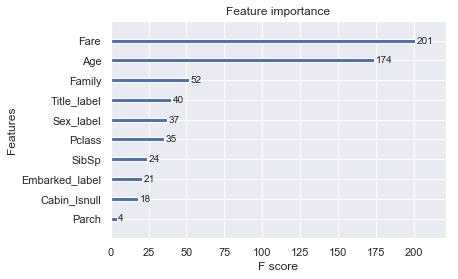

In [65]:
model = XGBClassifier()
model.fit(X,Y)
plot_importance(model)

In [60]:
full_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'Family',
       'FareScope', 'FareGroup', 'Cabin_Isnull', 'AgeScope', 'AgeGroup',
       'Title_label', 'Embarked_label', 'Sex_label'],
      dtype='object')

In [ ]:
model=GradientBoostingClassifier()
model.fit(X_scaled,Y)
model.feature_importances_
pd.DataFrame({'importance':model.feature_importances_},index=X.columns).sort_values(by='importance',ascending=False)


# <font color=#0099ff face="微软雅黑">Titanic——SVM建模</font>  

## <font color=#0099ff face="微软雅黑">baseline model</font>  

In [44]:
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.linear_model import LogisticRegression
#from sklearn.naive_bayes import GaussianNB
#from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

D:\Anaconda2\envs\py3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [67]:
#随机森林
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.3,random_state=6) #test_size是测试集占总数据集的比例


random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X, Y)
score_ = random_forest.score(X, Y)
score = cross_val_score(random_forest,X,Y,cv=10).mean() #交叉验证集准确度 10折
print('测试集准确度:{}\n交叉验证集准确度:{}'.format(round(score_*100,4),round(score*100,4)))


测试集准确度:98.6532
交叉验证集准确度:82.2793


In [69]:
rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
rf.fit(X, Y)
score_ = rf.score(X, Y)
score = cross_val_score(rf,X,Y,cv=10).mean() #交叉验证集准确度 10折
print('测试集准确度:{}\n交叉验证集准确度:{}'.format(round(score_*100,4),round(score*100,4)))


测试集准确度:91.2458
交叉验证集准确度:82.6051


In [68]:
#a = cross_val_score(random_forest,X,Y,cv=10)
a

array([0.77777778, 0.81111111, 0.73033708, 0.83146067, 0.84269663,
       0.83146067, 0.80898876, 0.79775281, 0.87640449, 0.84090909])

In [70]:
Y_pred = rf.predict(X_test)

submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred.astype(int)
    })
submission.to_csv('D:/myprograms/titanic/submission/RF.csv', index=False)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_features='auto', oob_score=True, random_state=1, n_jobs=-1)

param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10], "min_samples_split" : [2, 4, 10, 12, 16], "n_estimators": [50, 100, 400, 700, 1000]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)

gs = gs.fit(X,Y)

print(gs.bestscore)
print(gs.bestparams)
print(gs.cvresults)

In [ ]:
#将训练集按3：7的比例拆分
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X_scaled,Y,test_size=0.3,random_state=6) #test_size是测试集占总数据集的比例

svc = SVC()
svc.fit(Xtrain, Ytrain)
score_ = svc.score(Xtest, Ytest)
score = cross_val_score(svc,X_scaled,Y,cv=10).mean() #交叉验证集准确度 10折
print('测试集准确度:{}\n交叉验证集准确度:{}'.format(round(score_*100,4),round(score*100,4)))
 
#测试集准确度:83.9552
#交叉验证集准确度:83.9623

#测试集准确度:83.9552
#交叉验证集准确度:83.7376 +MPPS

#测试集准确度:84.7015
#交叉验证集准确度:83.3967 +TPP FPP MPPS

## <font color=#0099ff face="微软雅黑">提取错误分类</font>  

In [ ]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=10,random_state=1)
kf.get_n_splits(X)


In [ ]:
# extract the indices of misclassified observations
rr=[]
for train_index, test_index in kf.split(X_scaled):
    pred=svc.fit(X_scaled.ix[train_index],Y[train_index]).predict(X_scaled.ix[test_index])
    rr.append(Y[test_index][pred!=Y[test_index]].index.values)

In [ ]:
whole_index=np.concatenate(rr)
len(whole_index)

In [ ]:
diff=full_df.ix[whole_index]

In [ ]:
diff.describe(include=['O'])

In [ ]:
diff.describe()

In [ ]:
a=diff.groupby(['Sex'])['Survived'].agg([('average','mean'),('number','count')])
a
#存在一些特例，观察什么样的男性容易获救，什么样的女性容易死亡

In [ ]:

a=diff.groupby(['Title','Pclass','SibSp','Parch'])['Survived'].agg([('average','mean'),('number','count')])
pd.set_option('max_rows', 63)
a

In [ ]:
pd.set_option('max_columns', 21)
diff.loc[(full_df.Title=='Miss')&(full_df.Pclass==3)&(full_df.Parch==0)&(full_df.SibSp==0)]


In [ ]:

diff.loc[(full_df.Title=='Miss')&(full_df.Pclass==3)&(full_df.Parch==0)&(full_df.SibSp==0)].groupby('Survived').mean()

In [ ]:

full_df.loc[(full_df.Title=='Mr')&(full_df.Pclass==3)&(full_df.Parch==0)&(full_df.SibSp==0)].groupby('Survived').mean()

In [ ]:
full_df.loc[(full_df.Title=='Mr')&(full_df.Pclass==1)&(full_df.Parch==0)&(full_df.SibSp==0)].groupby('Survived').mean()

## <font color=#0099ff face="微软雅黑">参数调优</font>  

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 2, 4], 'gamma':[0.125, 0.25, 0.5 ,1, 2, 4]}
clf = GridSearchCV(SVC(), parameters, scoring='accuracy')
clf.fit(X_scaled, Y)
print('The parameters of the best model are: ')
print(clf.best_params_)

In [ ]:
from sklearn.model_selection import GridSearchCV
svc_grid = GridSearchCV(SVC(), {"C": [i for i in range(1, 101)]}, cv=5)
svc_grid.fit(X_scaled, Y)
svc_grid.best_params_

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid={'C':[0.01,0.1,1,10],'gamma':[0.01,0.1,1,10]}
grid_search=GridSearchCV(SVC(),param_grid, scoring='accuracy')

grid_search.fit(X_scaled,Y)

grid_search.best_params_,grid_search.best_score_

In [ ]:
#second round grid search
param_grid={'C':[1,2,4,6,8,10,12,14],'gamma':[0.008,0.01,0.012,0.015,0.02]}
grid_search=GridSearchCV(SVC(),param_grid, scoring='accuracy')

grid_search.fit(X_scaled,Y)

grid_search.best_params_,grid_search.best_score_

## <font color=#0099ff face="微软雅黑">预测</font>  

In [ ]:
svc = SVC(C=1)
svc.fit(X_scaled, Y)
Y_pred = svc.predict(X_test_scaled)

submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred.astype(int)
    })
submission.to_csv('D:/myprograms/titanic/submission/SVM.csv', index=False)